# Base data analysis

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import calendar
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [39]:
df = pd.read_csv('data/dataset.csv', low_memory=False)
df.head(10)

,Year,Month,Consumer_number,Consumer_type,Installation_zone,Consumption,Installation_number
0,2013,1,21018,1,4,0,nan
1,2013,1,36690,2,6,5,nan
2,2013,1,17940,1,6,6,nan
3,2013,1,14273,1,6,1,nan
4,2013,1,5,1,6,13,nan
5,2013,1,7,2,6,27,nan
6,2013,1,44192,2,6,5,nan
7,2013,1,11,1,6,31,nan
8,2013,1,40297,2,6,2,nan
9,2013,1,13,2,6,0,nan


In [40]:
len(df)

352944

In [41]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Consumer types description

In [100]:
cons_tipos = [[1, 'DOMESTICO'], [2, ' COM/INDUSTRIAL/OBRAS'], [3, 'UTIL.PUBLICA'], [4, 'OBRAS'], [5, 'ESTADO'], 
              [6, 'IGREJAS'], [7, 'EXP.A.RURAL'], [9, 'RURAL DOMESTICO'], [10, 'RURAL/ESTADO'], [11, 'FAM.NUMEROSAS'], 
              [12, 'FAM.CARENCIADAS'], [13, 'NUMER./CARENC.'], [14, 'CP.DOM/URB'], [15, 'CP.COM/URB'], [16, 'CP.DOM/RURAL'], 
              [17, 'CP.COM/RURAL'], [18, 'IPSS/IGR/RURAL'], [19, 'DOM./RURAL A.S'], [20, 'COM./RURAL A.S'], 
              [21, 'REGA'], [22, 'CMB']]
cons_tipos = pd.DataFrame(cons_tipos, columns = ['Code', 'Name'])

In [101]:
consumer = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number", 'Month',  'Year'])
consumer.head(5)

,Consumer_type,Consumption
0,1,0
1,2,5
2,1,6
3,1,1
4,1,13


In [102]:
cons_tipo_description = pd.DataFrame({'Consumer_type' : [], 'Count':[], 'Max_consumption' : [], 
                                      'Min_consumption' : [], 'Avg_consumption' : [], 'Std_consumption' : []})
columns = list(cons_tipo_description)
data = []

In [103]:
for i in consumer['Consumer_type'].unique():
    if i == 0:
        continue
    consumer_i = consumer[consumer['Consumer_type'] == i]
    consumer_type_name = cons_tipos[cons_tipos['Code'] == i].Name.item()
    N = len(consumer_i)
    Max = consumer_i['Consumption'].max()
    Min = consumer_i['Consumption'].min()
    Avg = consumer_i['Consumption'].mean()
    Std = consumer_i['Consumption'].std()
    values = [consumer_type_name, N, Max, Min, Avg, Std]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
cons_tipo_description = cons_tipo_description.append(data, True)
cons_tipo_description = cons_tipo_description.sort_values('Consumer_type')

In [104]:
cons_tipo_description = cons_tipo_description.sort_values('Count', ascending=False)


In [105]:
cons_tipo_description = cons_tipo_description.sort_index()
cons_tipo_description

,Consumer_type,Count,Max_consumption,Min_consumption,Avg_consumption,Std_consumption
0,DOMESTICO,244607.00,2119.00,0.00,6.80,8.75
1,COM/INDUSTRIAL/OBRAS,23889.00,4978.00,0.00,11.07,61.20
2,OBRAS,2887.00,635.00,0.00,7.48,22.13
3,UTIL.PUBLICA,885.00,4408.00,0.00,171.33,466.59
4,ESTADO,1208.00,2710.00,0.00,110.41,294.36
5,DOM./RURAL A.S,6996.00,1037.00,0.00,5.98,14.48
6,FAM.CARENCIADAS,1456.00,113.00,0.00,8.81,8.09
7,CP.DOM/URB,1177.00,97.00,0.00,5.19,7.69
8,RURAL DOMESTICO,66913.00,920.00,0.00,4.91,8.22
9,COM./RURAL A.S,177.00,111.00,0.00,14.54,19.21


In [154]:
from html2image import Html2Image

def save_table_as_pic(df, name):
    dict_data = [df.to_dict(), df.to_dict('index')]

    htmldf = '<table  width="auto" ><tr>'

    for key in dict_data[0].keys():
        htmldf = htmldf + '<th class="header" height="30px" style="font-weight: bold; background-color: #6b9080">' + key + '</th>'

    htmldf = htmldf + '</tr>'

    for key in dict_data[1].keys():
        htmldf = htmldf + '<tr height="30px"'
        htmldf = htmldf + 'style="background-color: #eaf4f4">' if key % 2 == 0 else htmldf + 'style="background-color: #f6fff8">'
        for subkey in dict_data[1][key]:
            htmldf = htmldf + '<td>' + str(dict_data[1][key][subkey]) + '</td>'
        htmldf = htmldf + '</tr>'

    htmldf = htmldf + '</tr></table>'

    with open(name+'.html','wb') as f:
        f.write(htmldf.encode("iso-8859-1"))
    
    hti = Html2Image()
    with open(name+'.html') as f:
        hti.screenshot(f.read(), save_as=name+'.jpg')




In [155]:
save_table_as_pic(cons_tipo_description, 'cons_tipo_description')

# Description by zonas values

In [166]:
zona = df.drop(columns=["Consumer_number", 'Consumer_type', "Installation_number", 'Month', 'Year'])
zona = zona.groupby(['Installation_zone'], as_index=False).sum()
zona

,Installation_zone,Consumption
0,1,570209
1,3,635036
2,4,638030
3,6,490424
4,22,11200
5,23,15914
6,24,14403
7,25,47135
8,26,5394
9,27,5895


In [167]:
zona_names = pd.read_excel("data/geo_data/apoio/zona_coordinates.xlsx", sheet_name="Folha1").drop(columns=['X', 'Y'])
zona_names.head()

,Zona,Nome
0,1,Gimonde
1,3,Santa-Maria
2,4,Samil
3,6,Sé
4,22,Crijó de Parada


In [168]:
zonas_description = pd.DataFrame({'Zone' : [], 'Max_consumption' : [], 
                                      'Min_consumption' : [], 'Avg_consumption' : []})
columns = list(zonas_description)
data = []

In [159]:
for i in zona['Installation_zone'].unique():
    if i == 0:
        continue
    zone_i = zona[zona['Installation_zone'] == i]
    zone_name = zona_names[zona_names['Zona'] == i].Nome.item()
    N = len(zone_i)
    Max = zone_i['Consumption'].max()
    Min = zone_i['Consumption'].min()
    Avg = zone_i['Consumption'].mean()
    Std = zone_i['Consumption'].std()
    values = [zone_name, N, Max, Min, Avg, Std]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
zonas_description = zonas_description.append(data, True)
zonas_description = zonas_description.sort_values('Count', ascending=False)
zonas_description.sample(5)

,Zone,Count,Max_consumption,Min_consumption,Avg_consumption,Std_consumption
38,Mós,1.00,8412.00,8412.00,8412.00,nan
18,Salsas,1.00,8779.00,8779.00,8779.00,nan
28,Rabal,1.00,4685.00,4685.00,4685.00,nan
48,Parâmio,1.00,9737.00,9737.00,9737.00,nan
25,Castrelos,1.00,2882.00,2882.00,2882.00,nan


In [160]:
len(zonas_description)

49

In [161]:
save_table_as_pic(zonas_description, 'zonas_description')

# Total consumption

In [22]:
df1 = df.drop(columns=["Consumer_number", "Installation_zone", "Consumo", "Installation_number", 
                       "Zona_cob", "Counter_number", "Counter_manufacturer", 
                       "Counter_caliber", 'Month'])
df1.head(5)

,Year,Consumer_type,Measure_method,Consumption
0,2013,1,L,0
1,2013,2,L,5
2,2013,1,L,6
3,2013,1,L,1
4,2013,1,L,13


In [23]:
df1 = df1.groupby(['Year', 'Consumer_type'], as_index=False).aggregate({'Consumption':'sum'})
df1.head(5)

,Year,Consumer_type,Consumption
0,2013,1,936922
1,2013,2,141569
2,2013,3,87447
3,2013,4,12537
4,2013,5,83973


In [24]:
df1['Consumption'] = (df1['Consumption']-df1['Consumption'].min())/(df1['Consumption'].max()-df1['Consumption'].min())
df1.head(5)

,Year,Consumer_type,Consumption
0,2013,1,0.88
1,2013,2,0.13
2,2013,3,0.08
3,2013,4,0.01
4,2013,5,0.08


In [25]:
df1.loc[df1['Consumer_type'] == 1, 'Consumer_type'] = "DOMESTICO"
df1.loc[df1['Consumer_type'] == 2, 'Consumer_type'] = "COM/INDUSTRIAL/OBRAS"
df1.loc[df1['Consumer_type'] == 3, 'Consumer_type'] = "UTIL.PUBLICA"
df1.loc[df1['Consumer_type'] == 4, 'Consumer_type'] = "OBRAS"
df1.loc[df1['Consumer_type'] == 5, 'Consumer_type'] = "ESTADO"
df1.loc[df1['Consumer_type'] == 6, 'Consumer_type'] = "IGREJAS"
df1.loc[df1['Consumer_type'] == 7, 'Consumer_type'] = "EXP.A.RURAL"
df1.loc[df1['Consumer_type'] == 9, 'Consumer_type'] = "RURAL DOMÉSTICO"
df1.loc[df1['Consumer_type'] == 10, 'Consumer_type'] = "RURAL/ESTADO"
df1.loc[df1['Consumer_type'] == 11, 'Consumer_type'] = "FAM.NUMEROSAS"
df1.loc[df1['Consumer_type'] == 12, 'Consumer_type'] = "FAM.CARENCIADAS"
df1.loc[df1['Consumer_type'] == 13, 'Consumer_type'] = "NUMER./CARENC."
df1.loc[df1['Consumer_type'] == 14, 'Consumer_type'] = " CP.DOM/URB"
df1.loc[df1['Consumer_type'] == 15, 'Consumer_type'] = "CP.COM/URB"
df1.loc[df1['Consumer_type'] == 14, 'Consumer_type'] = "CP.DOM/URB"
df1.loc[df1['Consumer_type'] == 16, 'Consumer_type'] = "CP.DOM/RURAL"
df1.loc[df1['Consumer_type'] == 17, 'Consumer_type'] = "CP.COM/RURAL"
df1.loc[df1['Consumer_type'] == 18, 'Consumer_type'] = "IPSS/IGR/RURAL"
df1.loc[df1['Consumer_type'] == 19, 'Consumer_type'] = "DOM./RURAL A.S"
df1.loc[df1['Consumer_type'] == 20, 'Consumer_type'] = "COM./RURAL A.S"
df1.loc[df1['Consumer_type'] == 21, 'Consumer_type'] = " REGA"
df1.loc[df1['Consumer_type'] == 22, 'Consumer_type'] = "CMB"


In [26]:
df1.head(5)

,Year,Consumer_type,Consumption
0,2013,DOMESTICO,0.88
1,2013,COM/INDUSTRIAL/OBRAS,0.13
2,2013,UTIL.PUBLICA,0.08
3,2013,OBRAS,0.01
4,2013,ESTADO,0.08


In [27]:
years_list = [2013, 2014, 2016, 2017, 2018, 2019, 2020]
types_of_consumidor = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [28]:
df1['Consumption'].isna().values.any()
df1.unstack(level=0, fill_value=0)
df1 = df1.pivot(index='Year', columns='Consumer_type', values='Consumption')
df1 = df1.fillna(0)

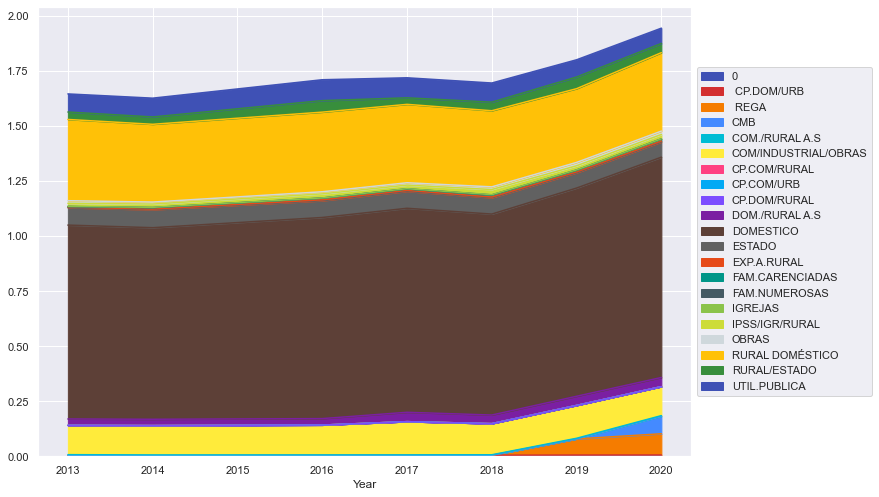

In [29]:
colors = ['#3F51B5', '#D32F2F', '#F57C00', '#448AFF', '#00BCD4',
          '#FFEB3B', '#FF4081', '#03A9F4', '#7C4DFF', '#7B1FA2',   
          '#5D4037', '#616161', '#E64A19', '#009688', '#455A64', 
          '#8BC34A', '#CDDC39', '#CFD8DC', '#FFC107', '#388E3C']
df1.plot.area(color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("charts/consumption_by_consumer_type_1.png", bbox_inches='tight')
plt.show()

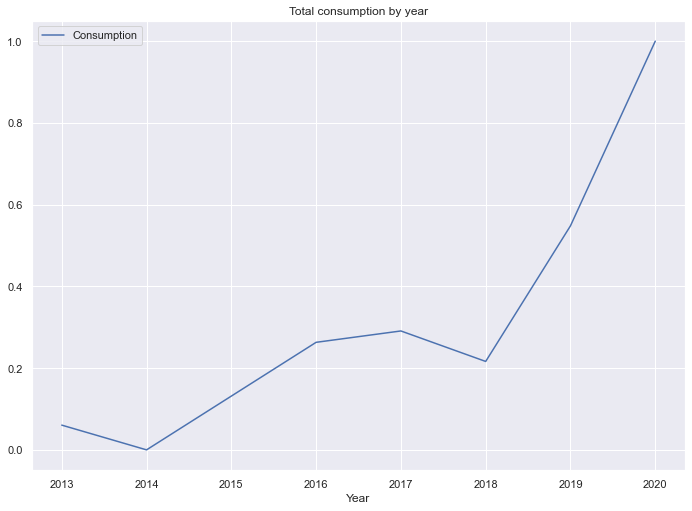

In [30]:
yearly = df.drop(columns=["Consumer_number", "Installation_zone", "Consumo", "Installation_number", 
                       "Zona_cob", "Counter_number", "Counter_manufacturer", 
                       "Counter_caliber", 'Month', 'Measure_method'])
yearly = yearly.groupby(['Year'], as_index=False).sum()
yearly['Consumption'] = (yearly['Consumption'] -yearly['Consumption'].min())/(yearly['Consumption'].max() - yearly['Consumption'].min())
yearly.plot.line(x='Year', y='Consumption', title="Total consumption by year")
plt.savefig('charts/total_consumption.png')
plt.show(block=True)

# Domestic types characteristic

In [187]:
domestico = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number"])
domestico = domestico[domestico['Consumer_type'] == 1].drop(columns=['Consumer_type'])
domestico

,Year,Month,Consumption
0,2013,1,0
2,2013,1,6
3,2013,1,1
4,2013,1,13
7,2013,1,31
...,...,...,...
352935,2020,12,0
352936,2020,12,0
352937,2020,12,0
352939,2020,12,0


In [188]:
domestico_sum = domestico.groupby(['Year', 'Month'], as_index=False).sum()
domestico_sum["Date"] = domestico_sum["Year"].astype(str) + "," + domestico_sum["Month"].astype(str)
print(domestico_sum)
# fig=plt.figure(figsize=(50,15))
# ax1=fig.add_subplot(221)
# ax1.tick_params(axis='x', rotation=90)
# sns.lineplot(x=domestico_sum.Date, y=domestico_sum.Consumption, ax=ax1)
# plt.savefig('charts/.png')
# plt.show(block=True)

    Year  Month  Consumption     Date
0   2013      1        22709   2013,1
1   2013      2        17949   2013,2
2   2013      3        17904   2013,3
3   2013      4        18650   2013,4
4   2013      5        20610   2013,5
..   ...    ...          ...      ...
79  2020      8        21389   2020,8
80  2020      9        17941   2020,9
81  2020     10        18554  2020,10
82  2020     11        17289  2020,11
83  2020     12        23972  2020,12

[84 rows x 4 columns]


<AxesSubplot:xlabel='Date', ylabel='Consumption'>

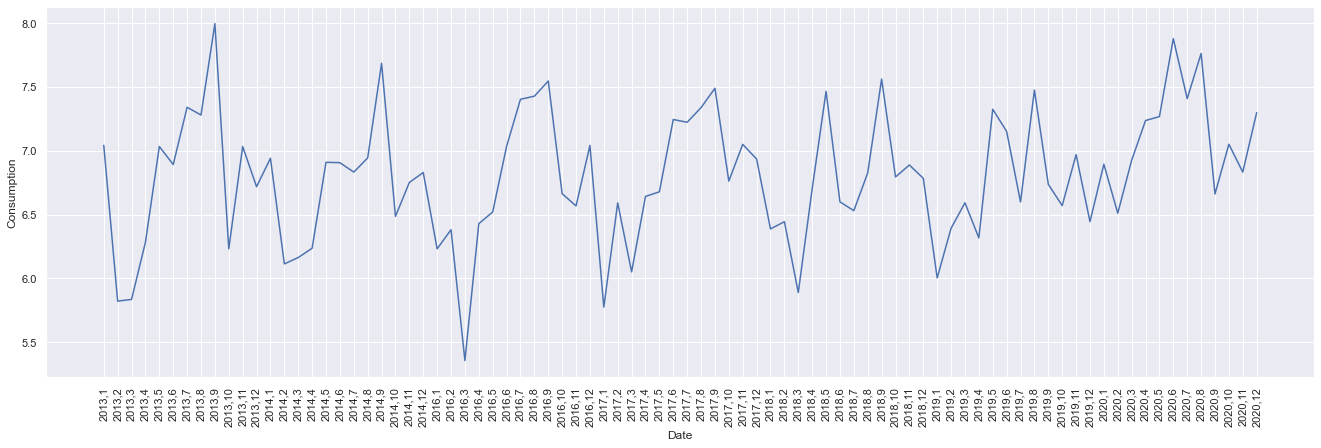

In [189]:
domestico_avg  = domestico.groupby(['Year', 'Month'], as_index=False).mean()
domestico_avg  ["Date"] = domestico_avg ["Year"].astype(str) + "," + domestico_avg["Month"].astype(str)
fig=plt.figure(figsize=(50,15))
ax=fig.add_subplot(221)
ax.tick_params(axis='x', rotation=90)
sns.lineplot(x=domestico_avg.Date, y=domestico_avg.Consumption, ax=ax)

# Industrial types characteristic

In [182]:
industrial = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number"])
industrial = industrial[industrial['Consumer_type'] == 2].drop(columns=['Consumer_type'])
industrial.head()

,Year,Month,Consumption
1,2013,1,5
5,2013,1,27
6,2013,1,5
8,2013,1,2
9,2013,1,0


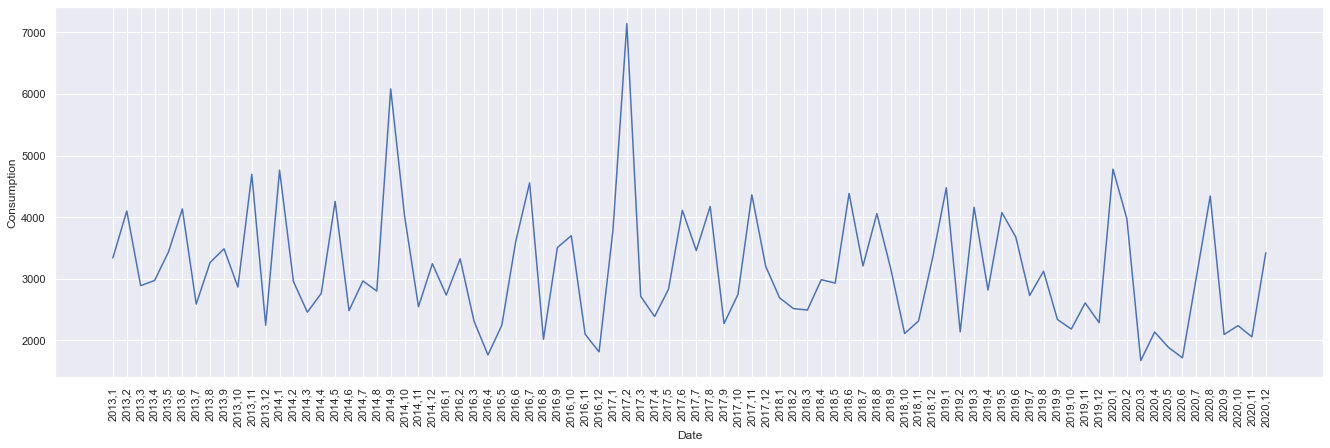

In [183]:
industrial_sum = industrial.groupby(['Year', 'Month'], as_index=False).sum()
industrial_sum["Date"] = industrial_sum["Year"].astype(str) + "," + industrial_sum["Month"].astype(str)
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
sns.lineplot(x=industrial_sum.Date, y=industrial_sum.Consumption, ax=ax1)
plt.savefig('charts/.png')
plt.show(block=True)

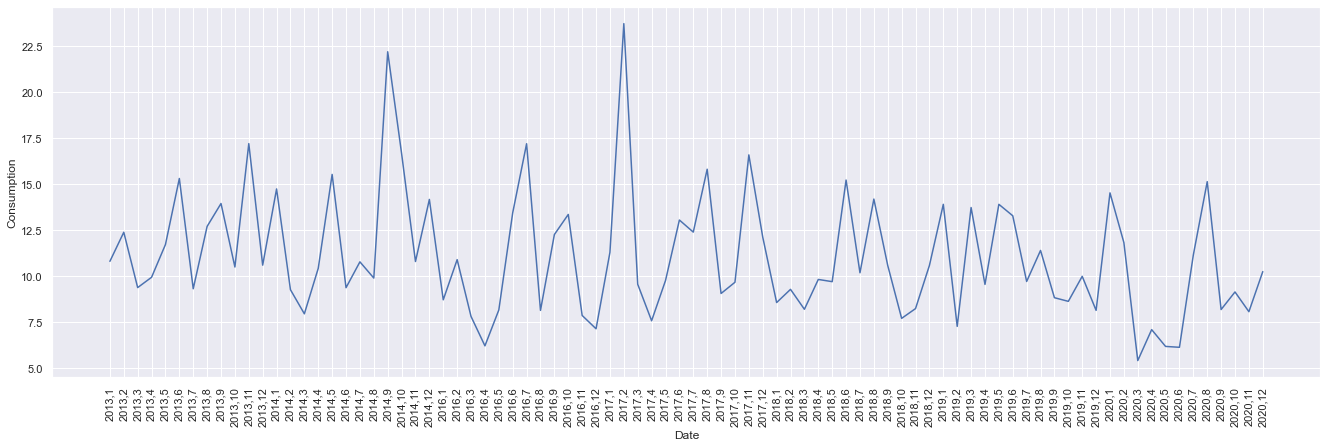

In [184]:
industrial_avg = industrial.groupby(['Year', 'Month'], as_index=False).mean()
industrial_avg["Date"] = industrial_avg["Year"].astype(str) + "," + industrial_avg["Month"].astype(str)
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
sns.lineplot(x=industrial_avg.Date, y=industrial_avg.Consumption, ax=ax1)
plt.savefig('charts/.png')
plt.show(block=True)

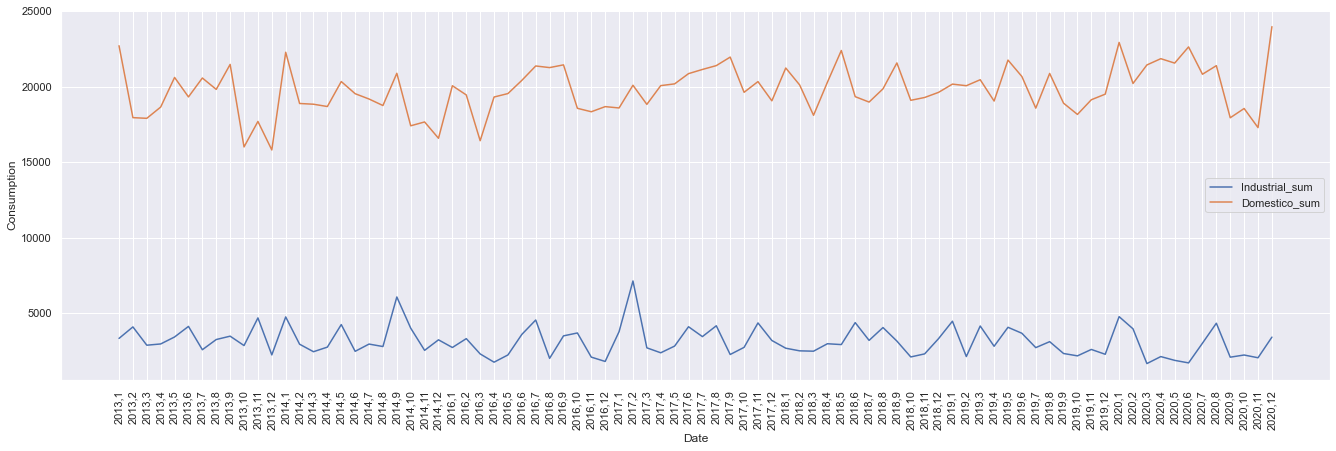

In [185]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)

firstPlot = sns.lineplot(x= industrial_sum.Date, y=industrial_sum.Consumption, label="Industrial_sum")
sns.lineplot(x=domestico_sum.Date, y=domestico_sum.Consumption, ax=firstPlot,  label="Domestico_sum")
plt.savefig('charts/Industrial_Domestico.png')
plt.show(block=True)


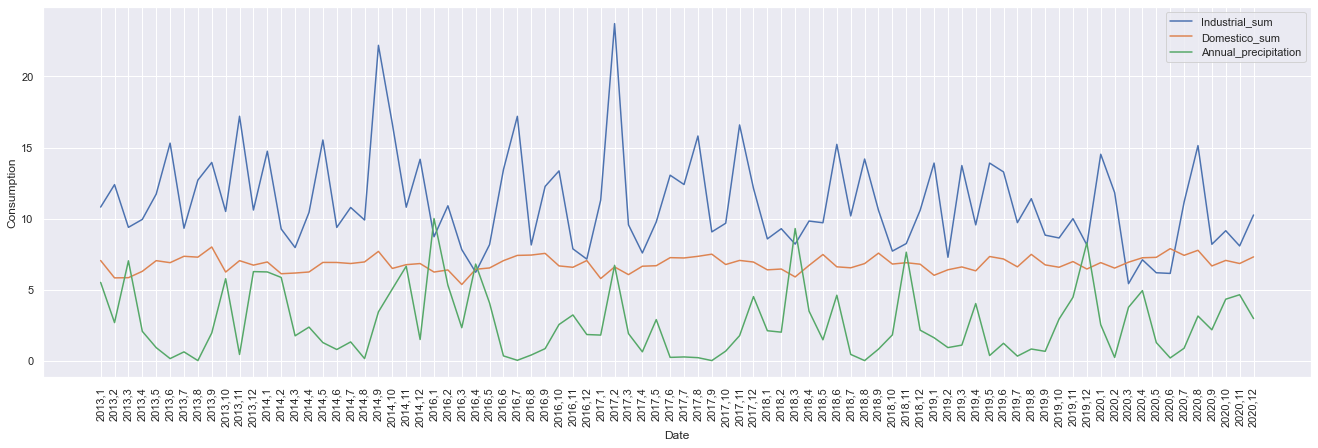

In [243]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
firstPlot = sns.lineplot(x= industrial_avg.Date, y=industrial_avg.Consumption, label="Industrial_sum")
sns.lineplot(x=domestico_avg.Date, y=domestico_avg.Consumption, ax=firstPlot,  label="Domestico_sum")
sns.lineplot(x=prcp.Date, y=prcp['QPRtot (mm)'], ax=firstPlot, label='Annual_precipitation')
plt.savefig('charts/Precipitation_Consumption_sum.png')
plt.show(block=True)


There is no dramatical changes of weather in May, 2020

Average weather in April, 2020 - 13.8(Day), 10(Night)
Average weather in May, 2020 - 22.2(Day), 14.4(Night)
Average weather in June 2020 - 23.3(Day), 15(Night)
Average weather in July 2020 - 30(Day), 20,5(Night)

# Precipitation analysis

In [222]:
prcp = pd.read_excel("data/precipitation.xlsx")
prcp.head()

,ANO,MÊS,QPRtot (mm)
0,2010,1,133.40
1,2010,2,201.20
2,2010,3,59.50
3,2010,4,106.90
4,2010,5,65.70


In [223]:
prcp = prcp.rename(columns={'ANO':'Year', 'MÊS':'Month'})
len(prcp)

132

In [224]:
prcp

,Year,Month,QPRtot (mm)
0,2010,1,133.40
1,2010,2,201.20
2,2010,3,59.50
3,2010,4,106.90
4,2010,5,65.70
...,...,...,...
127,2020,8,80.90
128,2020,9,55.90
129,2020,10,111.50
130,2020,11,119.60


In [225]:
prcp = prcp[(prcp['Year'] != 2015) & (prcp['Year'] != 2010) & (prcp['Year'] != 2011) & (prcp['Year'] != 2012)]
len(prcp)

84

In [231]:
prcp_norm = prcp.copy()

In [237]:
prcp_norm['QPRtot (mm)'] = ((prcp['QPRtot (mm)'])/(prcp['QPRtot (mm)'].max()))*10

In [238]:
prcp = prcp_norm.copy()

In [239]:
prcp["Date"] = prcp["Year"].astype(str) + "," + prcp["Month"].astype(str)
prcp = prcp.drop(columns=['Year', 'Month'])
prcp.head()

,QPRtot (mm),Date
36,5.50,"2013,1"
37,2.67,"2013,2"
38,7.02,"2013,3"
39,2.06,"2013,4"
40,0.91,"2013,5"


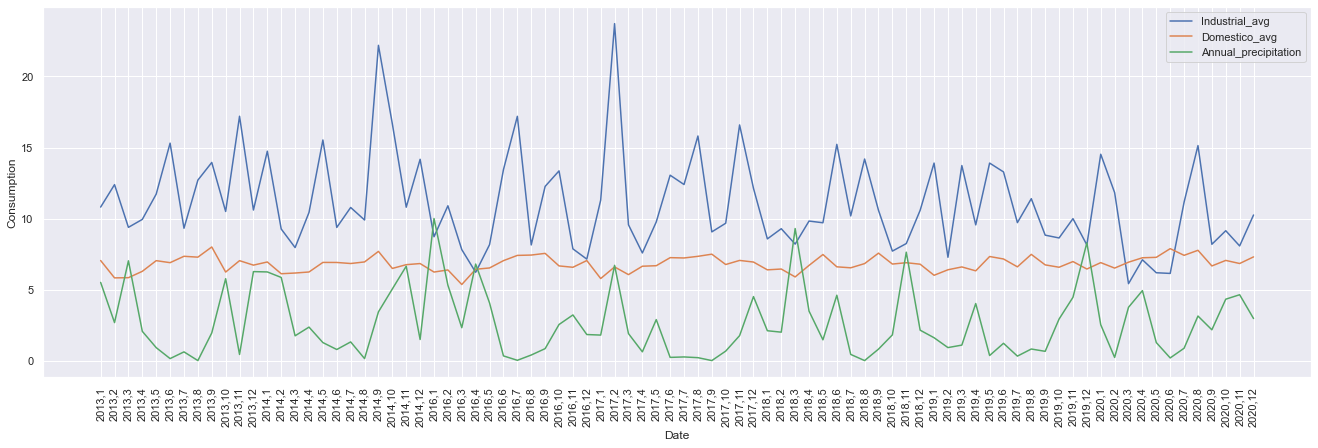

In [241]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
firstPlot = sns.lineplot(x= industrial_avg.Date, y=industrial_avg.Consumption, label="Industrial_avg")
sns.lineplot(x=domestico_avg.Date, y=domestico_avg.Consumption, ax=firstPlot,  label="Domestico_avg")
sns.lineplot(x=prcp.Date, y=prcp['QPRtot (mm)'], ax=firstPlot, label='Annual_precipitation')
plt.savefig('charts/Precipitation_Consumption_avg.png')
plt.show(block=True)


# Population analysis

In [258]:
population = pd.read_excel("data/bragança_population_growth.xlsx")
population

,Years,Net increase,Natural increase,Net migration
0,2013,-302,-203,-99
1,2014,-340,-226,-114
2,2016,-267,-199,-68
3,2017,-98,-184,86
4,2018,-82,-228,146
5,2019,21,-241,262
6,2020,-166,-334,168


In [260]:
yearly = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number", 'Month'])
yearly = yearly.groupby(['Year'], as_index=False).sum()
yearly['Consumption'] = (yearly['Consumption']-yearly['Consumption'].min())/(yearly['Consumption'].max() - yearly['Consumption'].min())


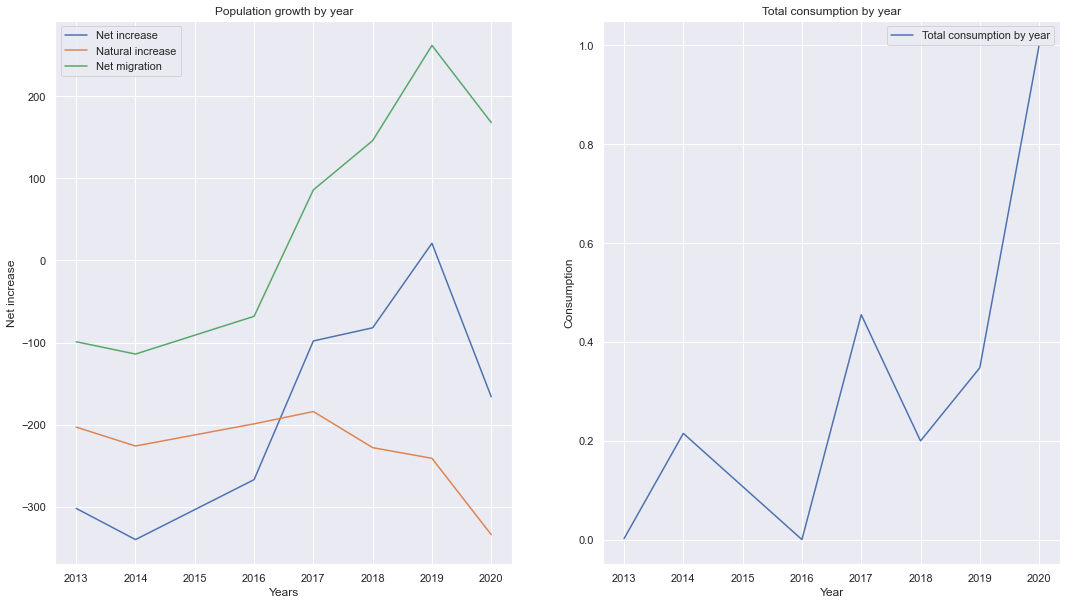

In [272]:
sns.set(rc={'figure.figsize':(18, 10)})
fig, axs = plt.subplots(ncols=2, nrows=1)
firstPlot = sns.lineplot(x=population.Years, y=population['Net increase'], ax=axs[0], label='Net increase').set_title("Population growth by year")
sns.lineplot(x=population.Years, y=population['Natural increase'], ax=axs[0], label='Natural increase')
sns.lineplot(x=population.Years, y=population['Net migration'], ax=axs[0], label='Net migration')
sns.lineplot(x=yearly.Year, y=yearly.Consumption, ax=axs[1], label="Total consumption by year").set_title("Total consumption by year")
plt.savefig('charts/population_and_consumption.png')
plt.show(block=True)